In [82]:
import sys
sys.path.append("../../lib")

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import dlop_ldn_function_bases as bases
import halton

In [3]:
def eval_lti(A, B, ts):
    return np.array([scipy.linalg.expm(A * t) @ B for t in ts])

In [2]:
dt = 1e-2
T = 10.0
ts = np.arange(0, T, dt)
N = len(ts)
H = bases.mk_fourier_basis(100, N)

A, B = bases.mk_ldn_lti(2)
M = eval_lti(A, B, ts)

M_H = np.linalg.pinv(H.T) @ M
M_H.shape

NameError: name 'np' is not defined

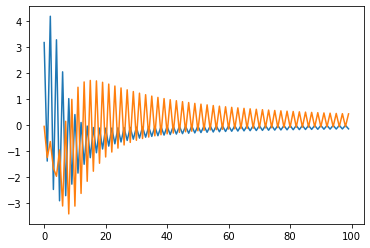

In [76]:
fig, ax = plt.subplots()
ax.plot(M_H)

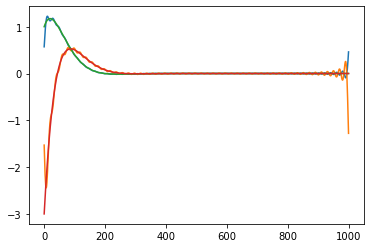

In [77]:
fig, ax = plt.subplots()
ax.plot(H.T @ M_H)
ax.plot(M)

In [78]:
def mk_sig():
    p = np.exp(-np.arange(H.shape[0]) * 0.1) * np.random.normal(0, 1, H.shape[0])

    return H.T @ p

In [79]:
def lstsq_cstr(A, b, C, d, reg=1e-3):
    A, b, C, d = np.array(A), np.array(b), np.array(C), np.array(d)

    assert A.ndim == 2
    assert b.ndim == 1
    assert C.ndim == 2
    assert d.ndim == 1

    assert A.shape[0] == b.shape[0]
    assert A.shape[1] == C.shape[1]
    assert C.shape[0] == d.shape[0]

    N_smpls = A.shape[0]
    N_vars = A.shape[1]
    N_cstr = C.shape[0]

    P = np.zeros((N_vars + N_cstr, N_vars + N_cstr))
    P[:N_vars, :N_vars] = 2 * (A.T @ A + N_smpls * np.square(reg))
    P[:N_vars, N_vars:] = -C.T
    P[N_vars:, :N_vars] = C

    q = np.zeros((N_vars + N_cstr))
    q[:N_vars] = 2 * A.T @ b
    q[N_vars:] = d

    return np.linalg.solve(P, q)[:N_vars]

In [1]:
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

angles = []
lens = []
for i in range(100):
    # Sample some test vector
    ξ = halton.halton_ball(2, i)

    # Sample a random signal
    xs = mk_sig()
    X_H = np.linalg.pinv(H.T) @ xs

    # Solve for a signal that is similar to the random signal,
    # but results in the desired activity ξ
    X_Hp = lstsq_cstr(np.eye(H.shape[0]), X_H, M_H.T, ξ)

    # Reconstruct the signal
    xs_p = H.T @ X_Hp

    # Convolve xs with m to compute the actual input
    ξp = np.array([
        np.convolve(xs_p[::-1], M[:, j], 'valid') for j in range(2)])

    ax.plot(*ξp, 'bo')
    ax.plot(*ξ, 'k+')
    ax.set_aspect(1)

    ax2.plot(xs[::-1], 'k--')
    ax2.plot(xs_p[::-1], 'k')
    

phis = np.linspace(-np.pi, np.pi, 100)
ax.plot(np.sin(phis), np.cos(phis), 'k-')

NameError: name 'plt' is not defined